In [64]:
from modified_louvain_method import *
from modified_spectral_method import *
import numpy as np
import matplotlib.pyplot as plt

In [29]:
if __name__ == "__main__":

    correlation_matrix,T,N,company_names = create_correlation_matrix('returns_standardized_S&P.csv')  
    C_g = calculate_C_g(correlation_matrix,T,N) #Modularity matrix
    print(correlation_matrix.shape)
    correlation_matrix_np = np.array(correlation_matrix)
    spectral_communities, company_communities_spectral, modularities = recursive_spectral_method(C_g, correlation_matrix,company_names,min_size=2, modularity_threshold=0.00001)
    print("Global modularity of modified Spectral method: ", calculate_global_modularity(spectral_communities, C_g, correlation_matrix_np))

(370, 370)
Global modularity of modified Spectral method:  0.03158894922232072


(2518, 370)


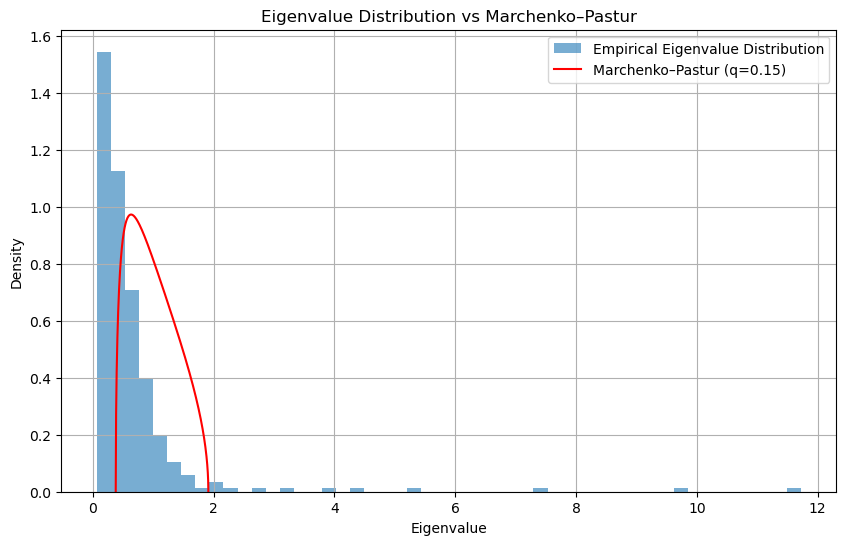

In [ ]:
# Calculate the eigenvalues of the correlation matrix

#eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix_np)


def marchenko_pastur_pdf(lambda_vals, q):
    """
    Compute the Marchenko–Pastur PDF for a given aspect ratio q = p / N.
    """
    lambda_min = (1 - np.sqrt(q))**2
    lambda_max = (1 + np.sqrt(q))**2
    pdf = np.zeros_like(lambda_vals)

    # Define the PDF within the bounds
    mask = (lambda_vals >= lambda_min) & (lambda_vals <= lambda_max)
    pdf[mask] = (1 / (2 * np.pi * q * lambda_vals[mask])) * np.sqrt((lambda_max - lambda_vals[mask]) * (lambda_vals[mask] - lambda_min))
    return pdf


df_standardized_returns = pd.read_csv('returns_standardized_S&P.csv')

#Remove the first column
df_standardized_returns = df_standardized_returns.iloc[:,1:]

print(df_standardized_returns.shape)

# Parameters
p = df_standardized_returns.shape[1]  # Number of variables
N = df_standardized_returns.shape[0]  # Number of observations
q = p / N  # Aspect ratio

# Calculate the Marchenko–Pastur bounds
lambda_min = (1 - np.sqrt(q))**2
lambda_max = (1 + np.sqrt(q))**2


lambda_vals = np.linspace(lambda_min, lambda_max, 500)

# Generate Marchenko–Pastur distribution
mp_pdf = marchenko_pastur_pdf(lambda_vals, q)

# # Plot the Marchenko–Pastur distribution
# plt.figure(figsize=(10, 6))
# plt.plot(lambda_vals, mp_pdf, label=f"Marchenko–Pastur (q={q:.2f})")
# plt.xlabel('Eigenvalue')
# plt.ylabel('Density')
# plt.title('Marchenko–Pastur Distribution')
# plt.legend()
# plt.grid()
# plt.show()

correlation_matrix = correlation_matrix_np



# Compute the eigenvalues of the correlation matrix
eigenvalues = np.linalg.eigvalsh(correlation_matrix)

#Remove the largest eigenvalue
eigenvalues = eigenvalues[:-1]

# Plot the eigenvalue distribution and compare it to the Marchenko–Pastur distribution
plt.figure(figsize=(10, 6))
plt.hist(eigenvalues, bins=50, density=True, alpha=0.6, label='Empirical Eigenvalue Distribution')
plt.plot(lambda_vals, mp_pdf, label=f"Marchenko–Pastur (q={q:.2f})", color='red')
plt.xlabel('Eigenvalue')
plt.ylabel('Density')
plt.title('Eigenvalue Distribution vs Marchenko–Pastur')
plt.legend()
plt.grid()
plt.show()


In [73]:
eigenvalues

array([1.40994299e+02, 1.17276380e+01, 9.85784060e+00, 7.34323694e+00,
       5.35696389e+00, 4.39775408e+00, 3.86970688e+00, 3.10546109e+00,
       2.72721836e+00, 2.16969571e+00, 2.12613209e+00, 2.03546911e+00,
       2.00981075e+00, 1.74539451e+00, 1.60347464e+00, 1.56238089e+00,
       1.52575615e+00, 1.51251421e+00, 1.46563860e+00, 1.43784618e+00,
       1.42881255e+00, 1.36143303e+00, 1.33216790e+00, 1.31770323e+00,
       1.30623059e+00, 1.27295020e+00, 1.26557758e+00, 1.23485295e+00,
       1.22072604e+00, 1.20959904e+00, 1.18428999e+00, 1.15820670e+00,
       1.14969645e+00, 1.12685178e+00, 1.10073018e+00, 1.08760586e+00,
       1.07392892e+00, 1.06741844e+00, 1.05905153e+00, 1.04933288e+00,
       1.03901722e+00, 1.03029319e+00, 1.02166683e+00, 1.01618535e+00,
       1.01042467e+00, 9.92264211e-01, 9.83186645e-01, 9.74823651e-01,
       9.65294134e-01, 9.49793787e-01, 9.38274237e-01, 9.33361151e-01,
       9.26881898e-01, 9.07101036e-01, 9.13460135e-01, 9.03282431e-01,
      

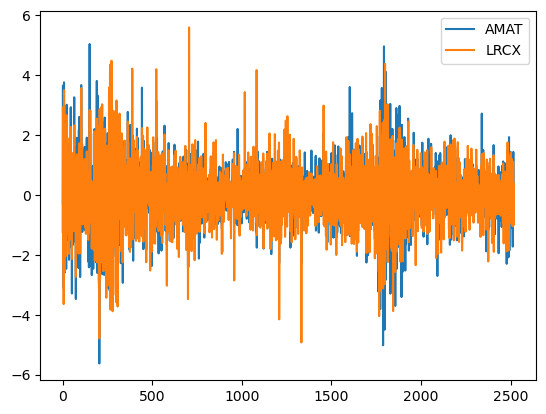

In [65]:
community1 = spectral_communities[0]

#Extract correlations between companies in community 1

correlation_matrix_community1 = correlation_matrix_np[community1,:][:,community1]


#Remove self-correlations
np.fill_diagonal(correlation_matrix_community1,np.nan)

#Find the pair of companies with the highest correlation
max_corr = np.nanmax(correlation_matrix_community1)
max_corr

#Get in indices of the pair of companies with the highest correlation
indices = np.unravel_index(np.nanargmax(correlation_matrix_community1), correlation_matrix_community1.shape)

df_standardized_returns = pd.read_csv('returns_standardized_S&P.csv')

#Get the time series of the two companies with the highest correlation
company1 = company_names[community1[indices[0]]]
company2 = company_names[community1[indices[1]]]

time_series_company1 = df_standardized_returns[company1]
time_series_company2 = df_standardized_returns[company2]

#Plot the time series of the two companies with the highest correlation
plt.plot(time_series_company1)
plt.plot(time_series_company2)
plt.legend([company1,company2])
plt.show()

In [48]:
np_array = np.array([[1,2,3],[4,5,6],[7,8,9]])

list_comm = [0,2]

print(np_array[list_comm,:][:,list_comm])

[[1 3]
 [7 9]]
